In [ ]:
pip install pandas


In [ ]:
pip install numpy

In [ ]:
pip install dabl

     |████████████████████████████████| 563kB 3.3MB/s 
  Created wheel for dabl: filename=dabl-0.1.8-cp36-none-any.whl size=565076 sha256=d74e87c233bd3f842791b095459e45e3d5cce8857fda650168691634c7fb4dc2
  Stored in directory: /root/.cache/pip/wheels/99/8c/79/9d33959b9b8676bf88a2e792075a2a17eda6b1711dc0fedca3
Successfully built dabl


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl 
import os

df = pd.read_csv('exams.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some college,standard,none,61,61,58
1,male,group C,some college,standard,none,55,45,47
2,female,group B,some college,standard,completed,67,65,72
3,female,group C,high school,free/reduced,none,52,67,60
4,male,group B,associate's degree,standard,completed,83,76,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group B,master's degree,free/reduced,completed,52,55,53
996,male,group E,some college,standard,completed,97,90,87
997,female,group A,high school,free/reduced,completed,58,78,73
998,female,group C,high school,standard,none,41,42,46
999,female,group C,high school,free/reduced,completed,54,62,58


In [ ]:
#номер уникальных предметов, присутствующих в категориальной колонке
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [ ]:
#Проверка процент пропущенных данных в каждом столбце, присутствующем в данных
no_of_columns = df.shape[0]
percentage_of_missing_data = df.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


In [ ]:
pip install seaborn 

Target looks like regression


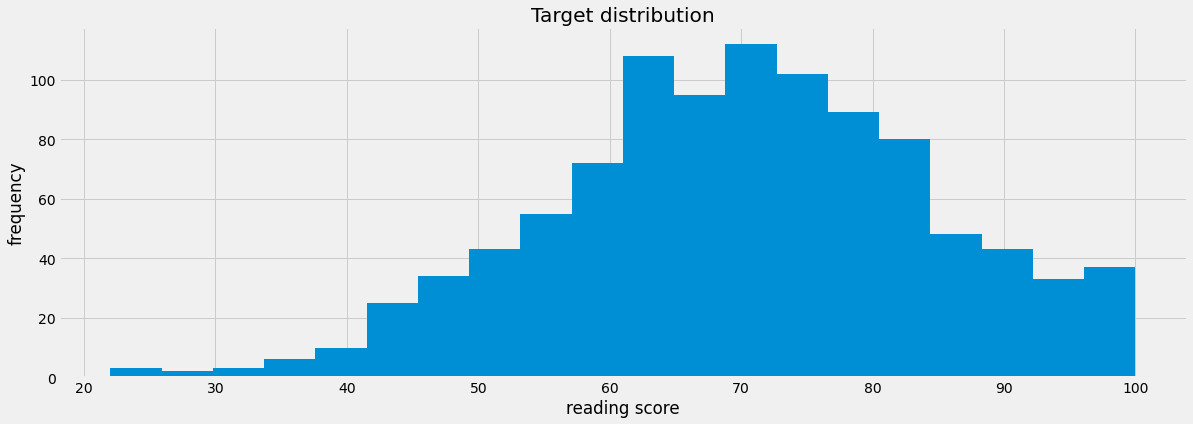

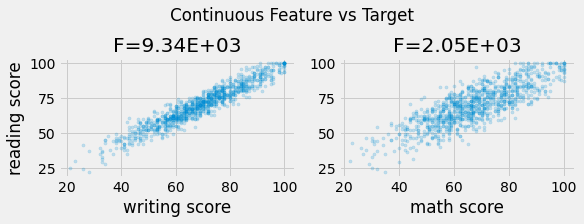

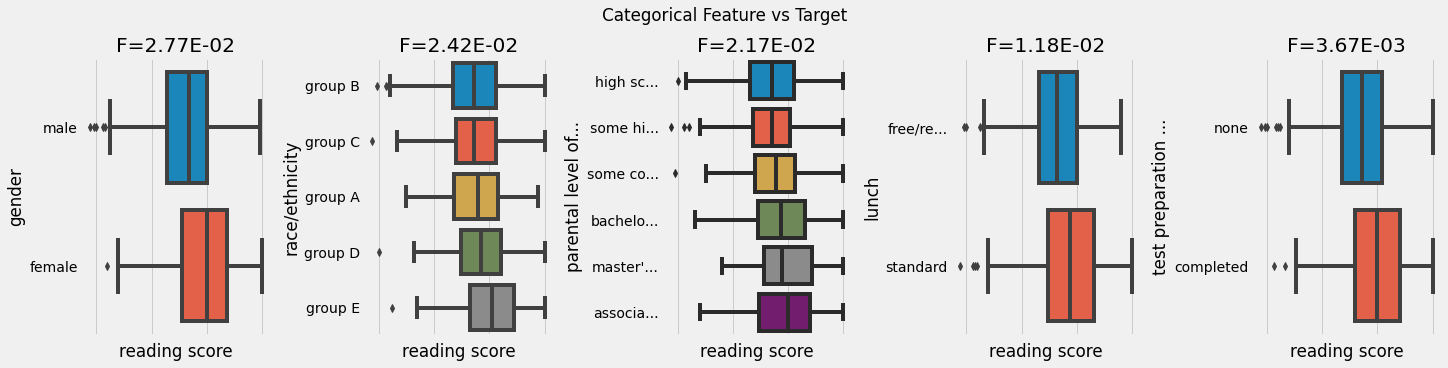

In [ ]:
#сравнение всех других атрибутов по отношению к знакам чтения

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'reading score')

Target looks like regression


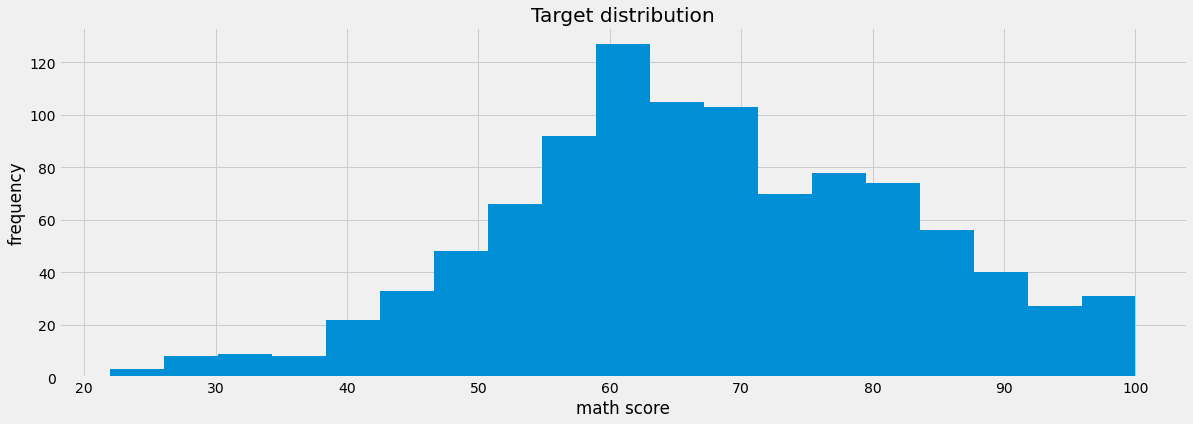

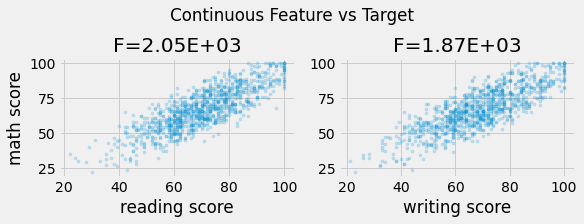

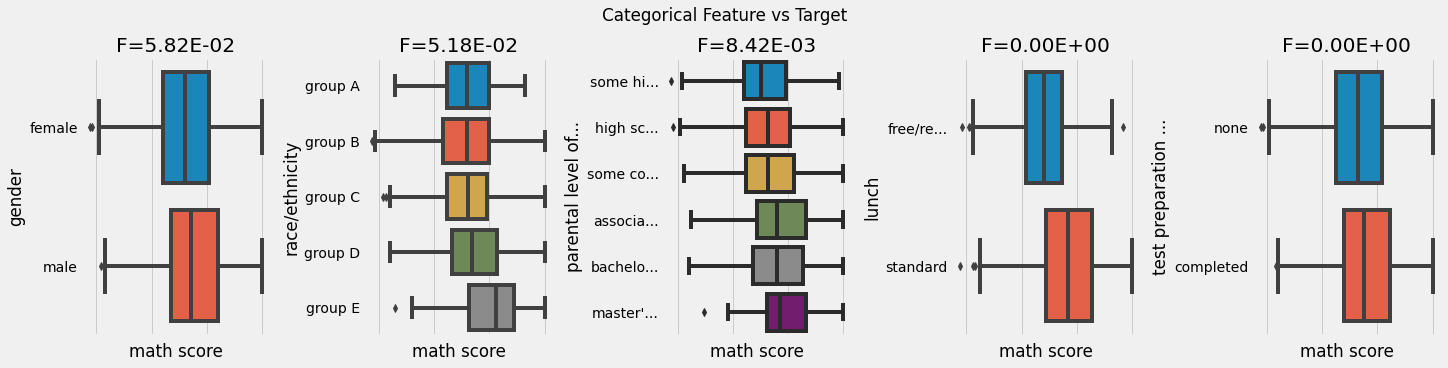

In [ ]:
#сравнение всех других атрибутов по отношению к математике

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'math score')

Target looks like regression


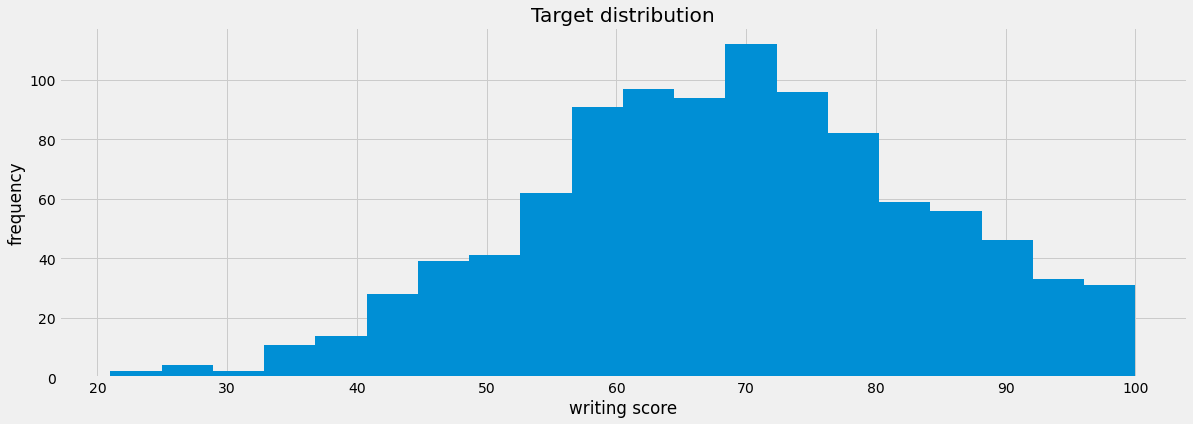

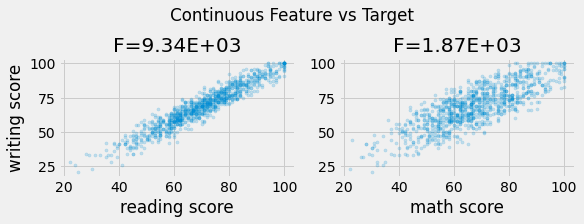

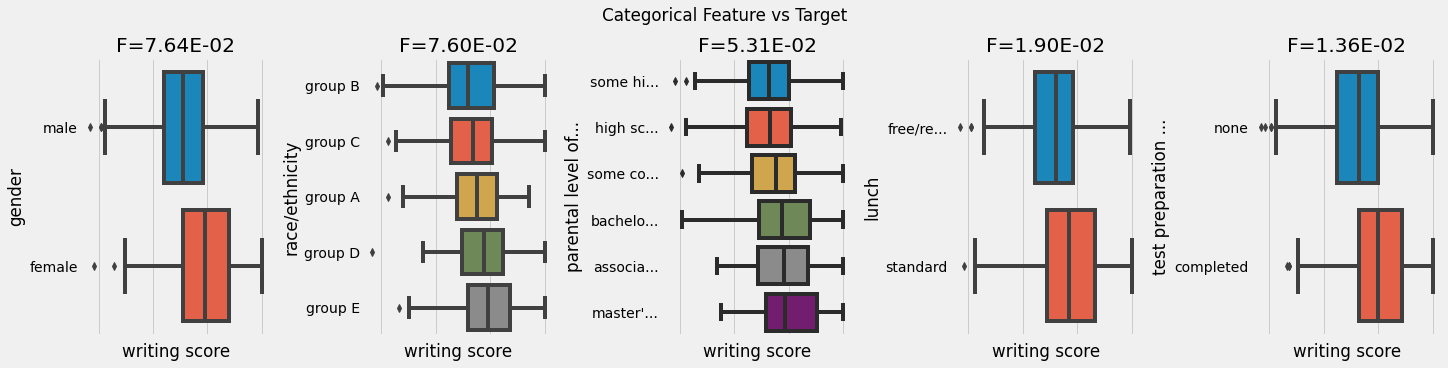

In [ ]:
#сравнение всех других атрибутов по отношению к написанию знаков

plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(df, target_col = 'writing score')

##Кодировка данных

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Создадим кодировку
le = LabelEncoder()

# Кодировка данных для "курса подготовки данных"
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# Кодировка данных для "наличие обеда"
df['lunch'] = le.fit_transform(df['lunch'])

# Кодировка данных для расы
## мы должны сопоставить значения для каждой из категорий
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

# Кодировка данных уровень обучения родителей студента
df['parental level of education'] = le.fit_transform(df['parental level of education'])

# Кодировка данных пола
df['gender'] = le.fit_transform(df['gender'])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,3,4,1,1,61,61,58
1,1,3,4,1,1,55,45,47
2,0,2,4,1,0,67,65,72
3,0,3,2,0,1,52,67,60
4,1,2,0,1,0,83,76,75


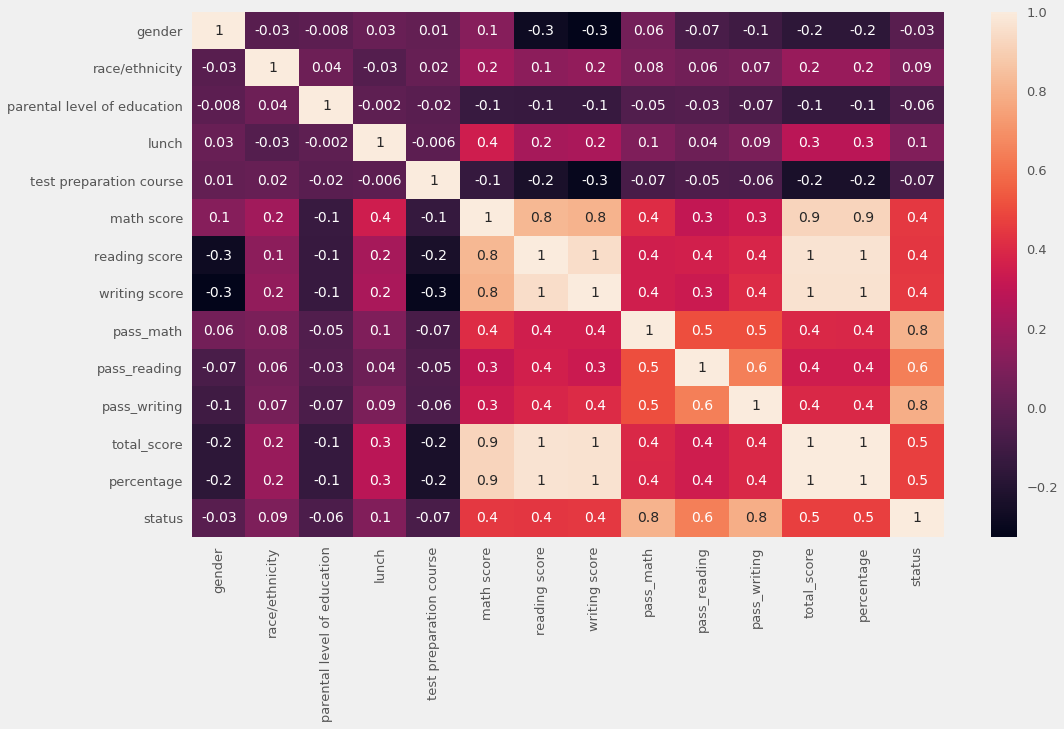

In [ ]:
sns.heatmap(df.corr(),annot = True,fmt='.1g')
#"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"


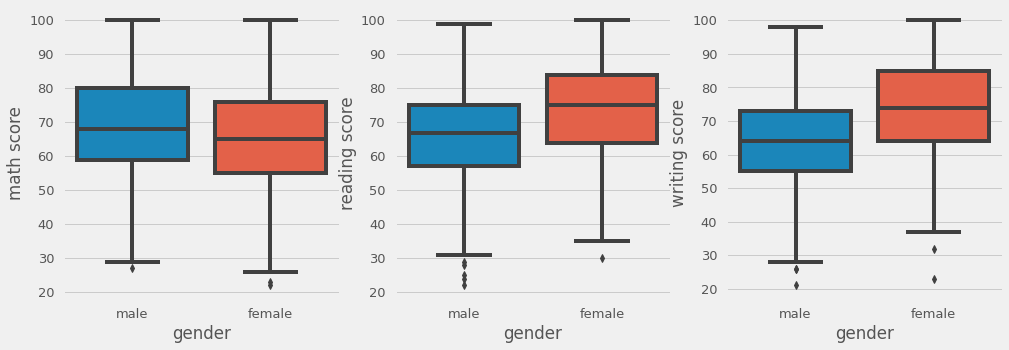

In [ ]:
#Этот блок-график ясно показывает оценки, выставленные мужчинами и женщинами в каждом разделе.
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math score', data = df)

plt.subplot(1,3,2)
sns.boxplot(x = 'gender', y = 'reading score', data = df)

plt.subplot(1,3,3)
sns.boxplot(x = 'gender', y = 'writing score', data = df)

##Выведение статистики

In [ ]:
#вероятность того, что учащиеся набрали более 50 баллов по математике
total_students = df.shape[0]
students_score_more_than_50 = df[df['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Вероятность того, что учащиеся набрали более 50 баллов по математике:", probability_of_students_scoring_more_than_50_in_maths)

Вероятность того, что учащиеся набрали более 50 баллов по математике: 28.4


In [ ]:
#Вероятность того, что студенты наберут более 50 баллов за чтение
total_students = df.shape[0]
students_score_more_than_50 = df[df['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Вероятность того, что студенты наберут более 50 баллов за чтение:", probability_of_students_scoring_more_than_50_in_reading)

Вероятность того, что студенты наберут более 50 баллов за чтение: 91.10000000000001


In [ ]:
#Вероятность того, что студенты наберут более 50 баллов в письменной форме
total_students = df.shape[0]
students_score_more_than_50 = df[df['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Вероятность того, что студенты наберут более 50 баллов в письменной форме:", probability_of_students_scoring_more_than_50_in_writing)

Вероятность того, что студенты наберут более 50 баллов в письменной форме: 88.0


In [ ]:
#Вероятность прохождения студентами по всем предметам где баллы выше 40
total_students = df.shape[0]
number_of_students_passing_in_all_subjects = df[(df['math score'] > 40) &
                                                  (df['writing score'] > 40) & 
                                                  (df['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("Вероятность прохождения студентами всех предметов {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

Вероятность прохождения студентами всех предметов 94.70 %


In [ ]:
#Вероятность прохождения студентами по всем предметам где баллы выше 90
total_students = df.shape[0]
number_of_students_scoring_more_than_90 = df[(df['math score'] > 90) &
                                                  (df['writing score'] > 90) & 
                                                  (df['reading score'] > 90)].shape[0]

probability_of_students_scoring_more_than_90_in_all_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("Вероятность прохождения студентами всех предметов {0:.2f} %".format(probability_of_students_scoring_more_than_90_in_all_subjects))

Вероятность прохождения студентами всех предметов 3.00 %


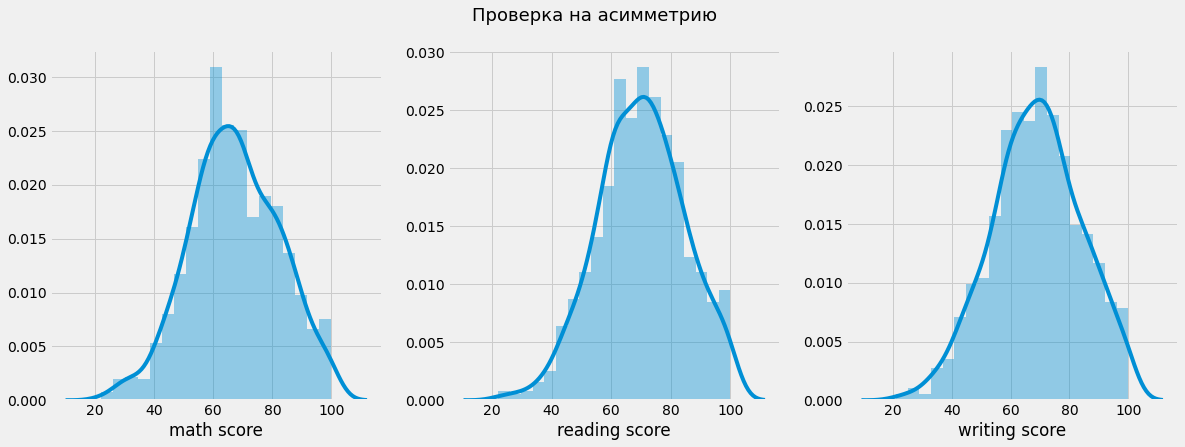

In [ ]:
#Проверка на асимметрию
plt.subplot(1, 3, 1)
sns.distplot(df['math score'])

plt.subplot(1, 3, 2)
sns.distplot(df['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(df['writing score'])

plt.suptitle('Проверка на асимметрию', fontsize = 18)
plt.show()

In [ ]:
# давайте возьмем начальное значение, так что каждый раз случайные значения оказываются постоянными
np.random.seed(6)

# давайте возьмем 100 значений выборки из набора данных 1000 значений
sample_math_marks = np.random.choice(a= df['math score'], size=100)

# получение среднего значения
print ("Среднее значения по математике:", sample_math_marks.mean())          

# получение среднего значения населения
print("Численность населения по математике:", df['math score'].mean())

# давайте возьмем 100 значений выборки из набора данных 1000 значений
sample_reading_marks = np.random.choice(a= df['reading score'], size=100)

# получение среднего значения
print ("\n Среднее значения для чтения очков:", sample_reading_marks.mean() )          

# получение среднего значения населения
print("Население означает чтение баллов:", df['reading score'].mean())

# давайте возьмем 100 значений выборки из набора данных 1000 значений
sample_writing_marks = np.random.choice(a= df['writing score'], size=100)

# получение среднего значения
print ("\n Среднее значения для написания баллов:", sample_math_marks.mean() )          

# получение среднего значения населения
print("Население означает для написания баллов:", df['writing score'].mean())

Среднее значения по математике: 68.6
Численность населения по математике: 67.224

 Среднее значения для чтения очков: 70.72
Население означает чтение баллов: 70.048

 Среднее значения для написания баллов: 68.6
Население означает для написания баллов: 68.782


**Давайте проверим доверительный интервал баллов по математике**

In [ ]:
import scipy.stats as stats
import math

# Создадим случайные значения для сидов 
np.random.seed(10)

# Выберем размер выборки данных
sample_size = 1000
sample = np.random.choice(a= df['math score'],
                          size = sample_size)
sample_mean = sample.mean()

# Получим z-критическое значение*
z_critical = stats.norm.ppf(q = 0.95)  

 # Проверим z-критическое значение  
print("z-критическое значение: ",z_critical)                                

# Получим стандартное отклонение числа 
pop_stdev = df['math score'].std()  

# Проверим погрешность
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# Определим доверительный интервал
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# Покажем результат
print("Доверительный интервал:",end=" ")
print(confidence_interval)
print("Истинное среднее: {}".format(df['math score'].mean()))

z-критическое значение:  1.6448536269514722
Доверительный интервал: (65.77118096281279, 67.34481903718722)
Истинное среднее: 67.224


**Позвольте проверить доверительный интервал для чтения**

In [ ]:
# Импортируем scipy
import scipy.stats as stats
import math

# Создадим случайные значения для сидов 
np.random.seed(10)

# Выберем размер выборки данных
sample_size = 1000
sample = np.random.choice(a= df['reading score'],
                          size = sample_size)
sample_mean = sample.mean()

# Получим z-критическое значение*
z_critical = stats.norm.ppf(q = 0.95)  

 # Проверим z-критическое значение
print("z-критическое значение: ",z_critical)                                

# Получим стандартное отклонение числа
pop_stdev = df['reading score'].std()  

# Проверим погрешность
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# Определим доверительный интервал
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# Покажем результат
print("Доверительный интервал:",end=" ")
print(confidence_interval)
print("Истинное среднее: {}".format(df['reading score'].mean()))

z-критическое значение:  1.6448536269514722
Доверительный интервал: (68.32513496142016, 69.83686503857984)
Истинное среднее: 70.048


**Позвольте проверить доверительный интервал для баллов письма**

In [ ]:
# Создадим случайные значения для сидов 
np.random.seed(10)

# Выберем размер выборки данных
sample_size = 1000
sample = np.random.choice(a= df['writing score'],
                          size = sample_size)
sample_mean = sample.mean()

# Получим z-критическое значение
z_critical = stats.norm.ppf(q = 0.95)  

 # Проверим z-критическое значение  
print("z-critical value: ",z_critical)                                

# Получим стандартное отклонение числа
pop_stdev = df['writing score'].std()  

# Проверим погрешность
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# Определим доверительный интервал
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# Покажем результат
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(df['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (67.09382397287985, 68.67617602712016)
True mean: 68.782



* Обратите внимание, что истинное среднее значение содержится в нашем интервале.
* Доверительный интервал 95% будет означать, что если мы возьмем много выборок и создадим доверительные интервалы для каждой из них, 95% доверительных интервалов наших выборок будет содержать истинное среднее значение популяции.

## Группировка операций

**Количество девушек, набравших 90 баллов по всем предметам**

In [ ]:
df[(df['gender'] == '0') &
     (df['math score'] > 90) & 
     (df['writing score'] > 90) &
     (df['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


**Давайте сравним результаты, полученные мальчиками и девочками**



In [ ]:
df.groupby(['gender']).agg(['min','median','max'])

math score             reading score  ...      writing score            
              min median  max           min  ...  max           min median  max
gender                                       ...                               
female         22     65  100            30  ...  100            23     74  100
male           27     68  100            22  ...   99            21     64   98

[2 rows x 9 columns]

**Давайте проверим влияние обеда на успеваемость ученика**

In [ ]:
df[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        58.0           70.0           70.0
             male          62.0           60.0           61.5
standard     female        70.0           77.0           77.0
             male          72.0           66.0           68.0

**Давайте проверим влияние курса подготовки к экзаменам**

In [ ]:
df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          68             81             80
                        male            70             69             69
none                    female          63             70             72
                        male            67             61             64

**Давайте проверим влияние расы и этнической принадлежности на успеваемость студента**

In [ ]:
df[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,65.0,69.0,70.0
group B,65.0,65.0,68.0
group C,65.5,67.0,68.0
group D,67.0,72.0,71.0
group E,78.0,74.0,76.0


# Визуализация данных

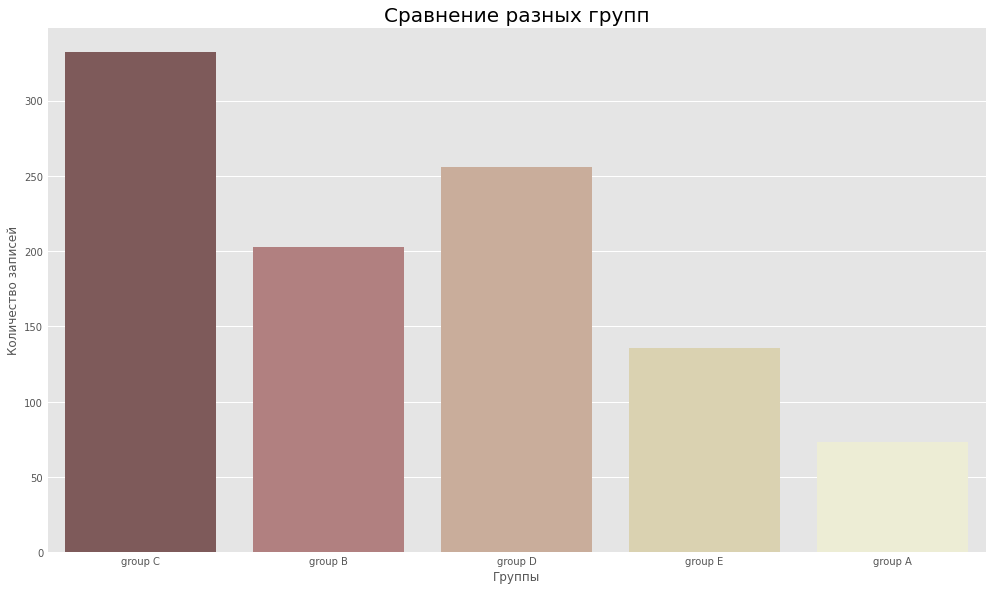

In [ ]:
# Визуализация различных групп(рас) в наборе данных

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(df['race/ethnicity'], palette = 'pink')
plt.title('Сравнение разных групп', fontweight = 30, fontsize = 20)
plt.xlabel('Группы')
plt.ylabel('Количество записей')
plt.show()

In [ ]:
# Визуализация различных уровней родительского образования

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Сравнение родительского образования', fontweight = 30, fontsize = 20)
plt.xlabel('Степень')
plt.ylabel('Количество')
plt.show()

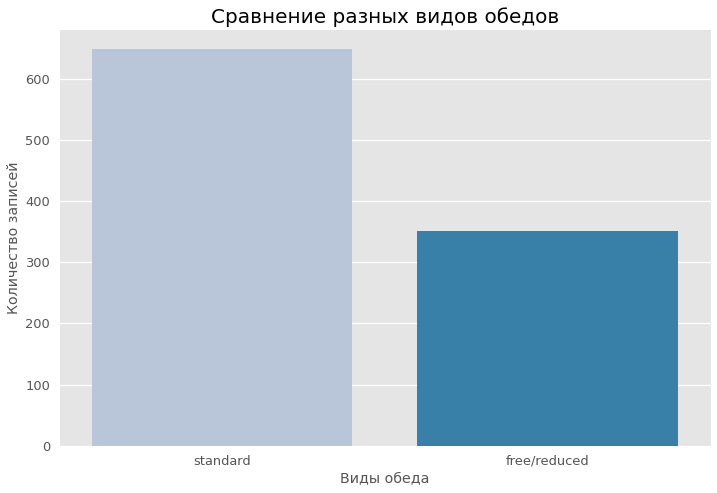

In [ ]:
# Визуализация различных видов обеда

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Сравнение разных видов обедов', fontweight = 30, fontsize = 20)
plt.xlabel('Виды обеда')
plt.ylabel('Количество записей')
plt.show()

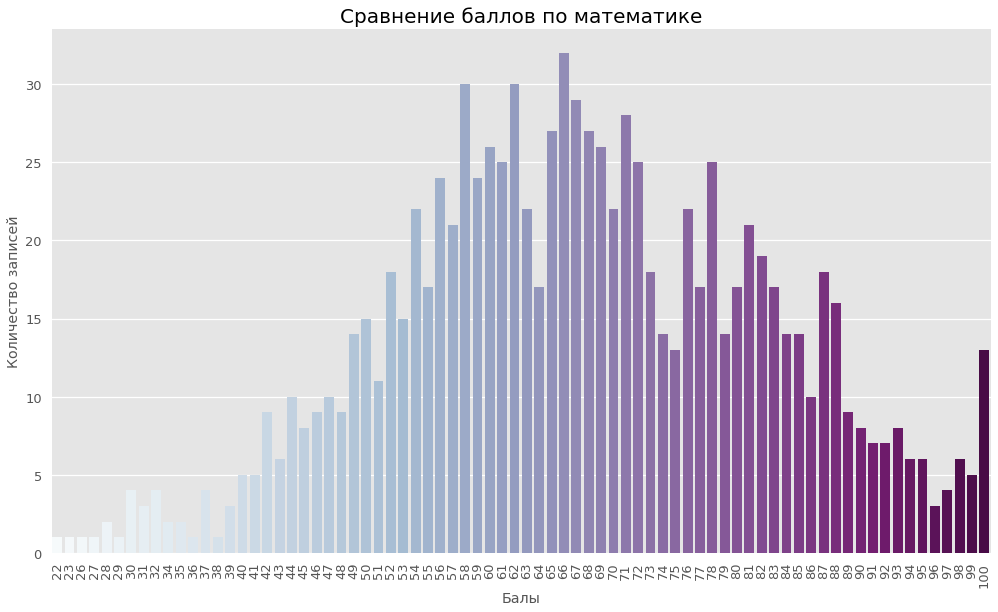

In [ ]:
# Визуализация баллов по математике

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['math score'], palette = 'BuPu')
plt.title('Сравнение баллов по математике', fontweight = 30, fontsize = 20)
plt.xlabel('Балы')
plt.ylabel('Количество записей')
plt.xticks(rotation = 90)
plt.show()

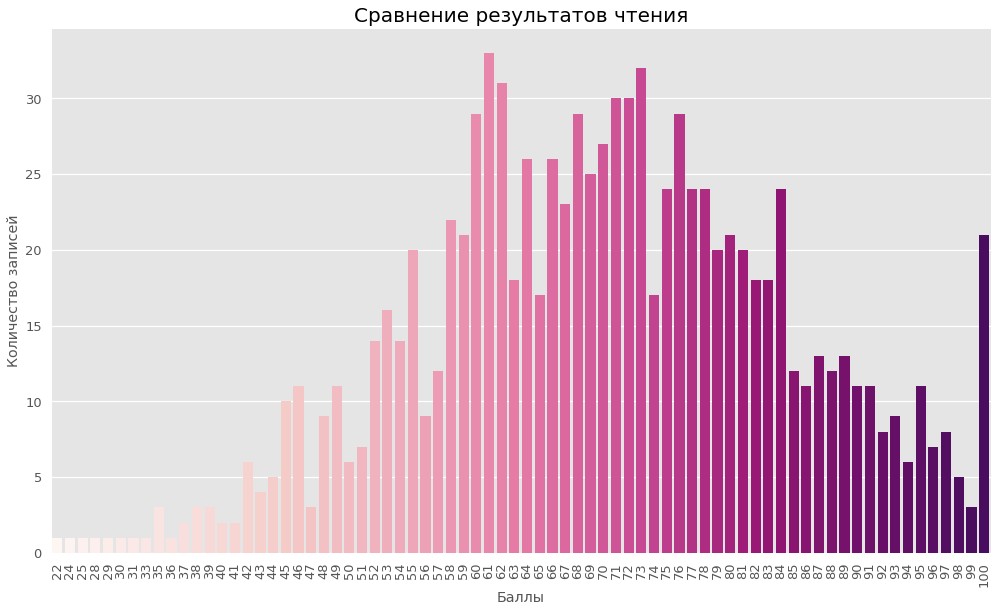

In [ ]:
# Визуализация баллов по чтению

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['reading score'], palette = 'RdPu')
plt.title('Сравнение результатов чтения', fontweight = 30, fontsize = 20)
plt.xlabel('Баллы')
plt.ylabel('Количество записей')
plt.xticks(rotation = 90)
plt.show()

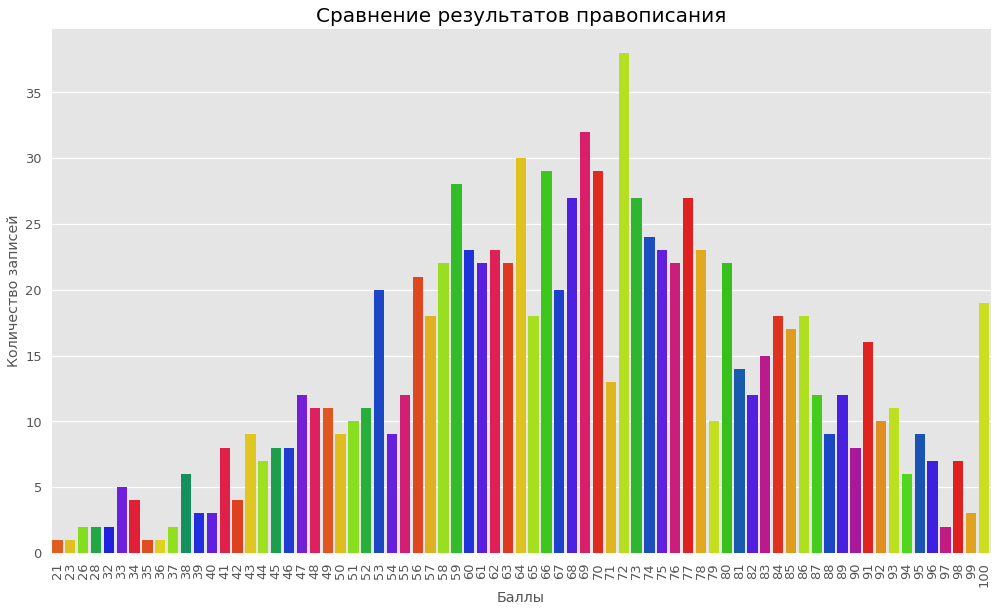

In [ ]:
# Визуализация баллов по письму

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(df['writing score'], palette = 'prism')
plt.title('Сравнение результатов правописания', fontweight = 30, fontsize = 20)
plt.xlabel('Баллы')
plt.ylabel('Количество записей')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# визуализация письменной оценки

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['writing score'], palette = 'prism')
plt.title('Сравнение письменных оценок', fontweight = 30, fontsize = 20)
plt.xlabel('Баллы')
plt.ylabel('Количество')
plt.xticks(rotation = 90)
plt.show()

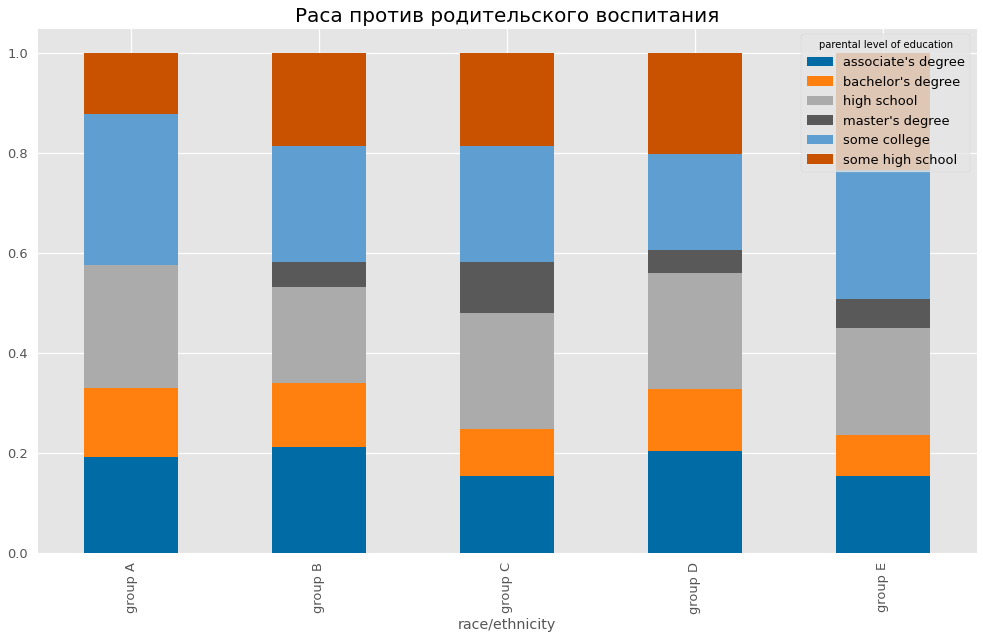

In [ ]:
# Cравнение расы / этнической принадлежности и уровня образования родителей

plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True')
plt.title('Раса против родительского воспитания', fontweight = 30, fontsize = 20)
plt.show()

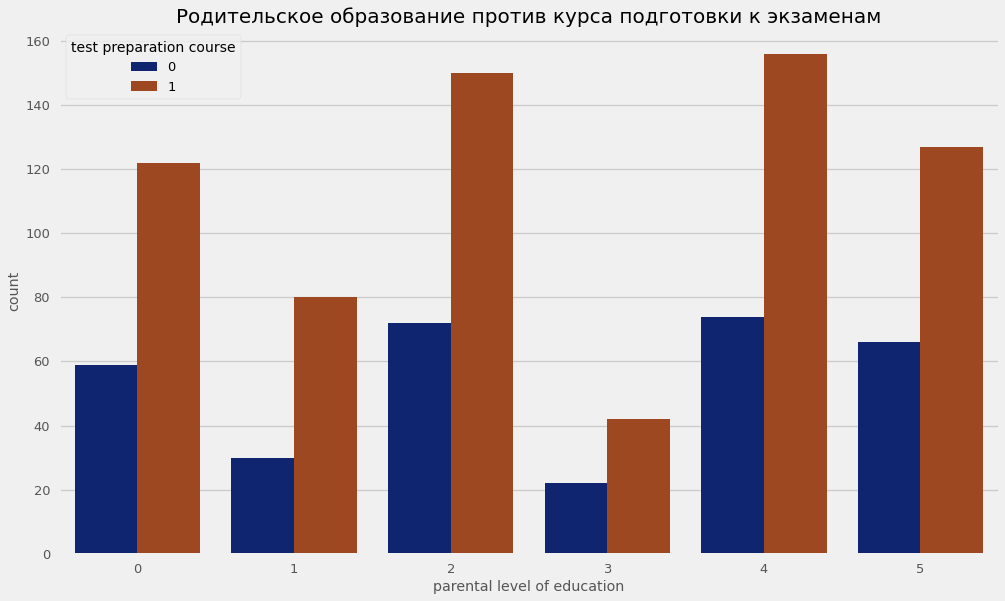

In [ ]:
# Сравнение родительского образования и кол-ва прохождений тествого курса

plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(x = 'parental level of education', data = df, hue = 'test preparation course', palette = 'dark')
plt.title('Родительское образование против курса подготовки к экзаменам', fontweight = 30, fontsize = 20)
plt.show()

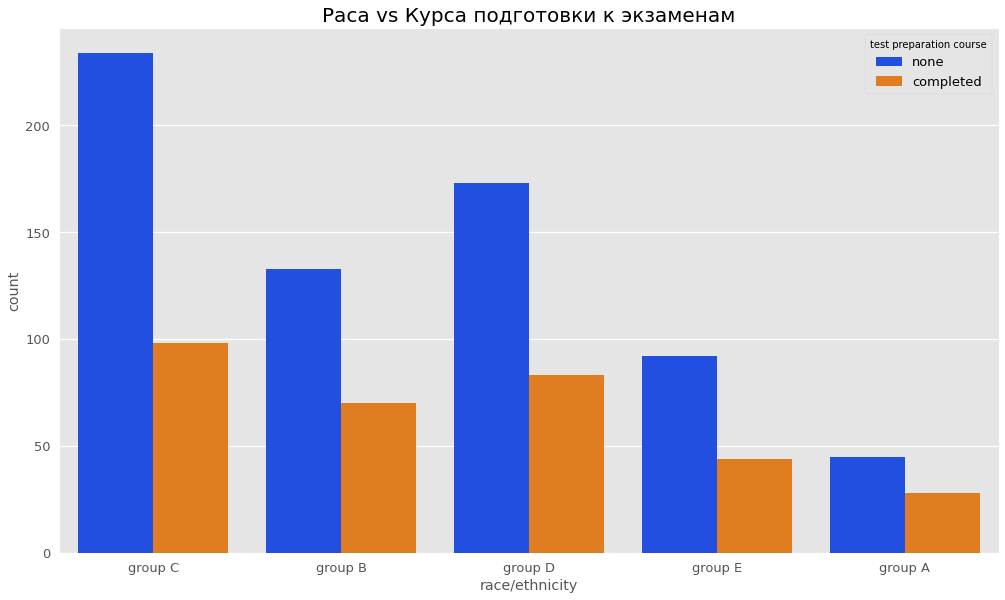

In [ ]:
# сравнение расы и кол-ва прохождения курса подготовки к экзамену

sns.countplot(x = 'race/ethnicity', data = df,  hue = 'test preparation course', palette = 'bright')
plt.title('Раса vs Курса подготовки к экзаменам', fontweight = 30, fontsize = 20)
plt.show()

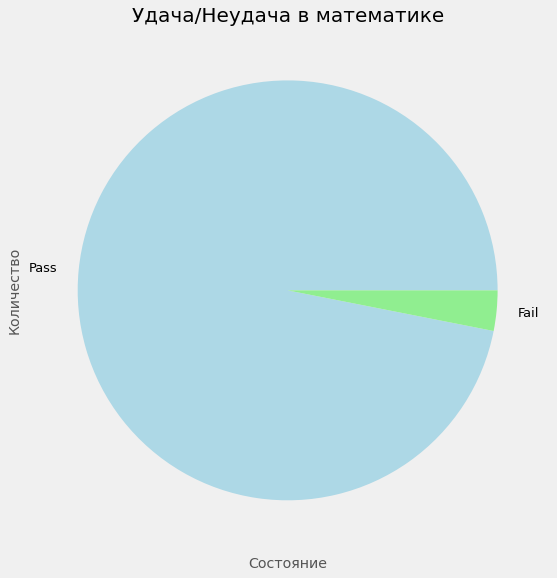

In [ ]:
# Проектирование данных для визуализации и более точного определения набора данных

# Установим проходной балл для студентов, чтобы они могли сдать экзамен по трем индивидуальным предметам 
passmarks = 40

# Создадим новый столбец pass_math, этот столбец сообщит нам, прошли ли студенты или нет
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Удача/Неудача в математике', fontweight = 30, fontsize = 20)
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.show()

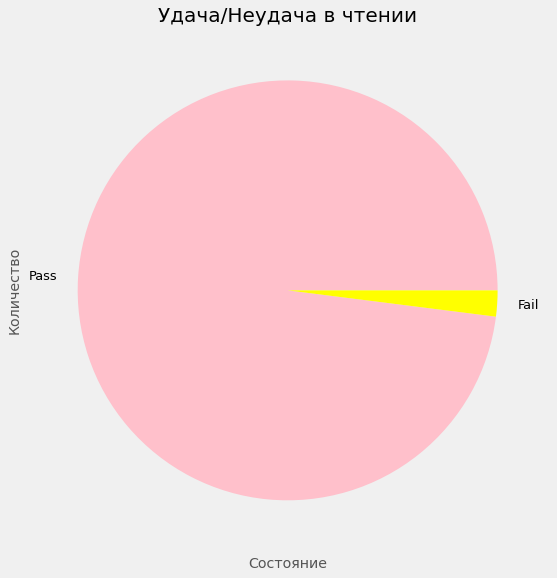

In [ ]:
# Создадим новый столбец pass_reading, этот столбец сообщит нам, прошли ли студенты или нет

df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Удача/Неудача в чтении', fontweight = 30, fontsize = 20)
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.show()

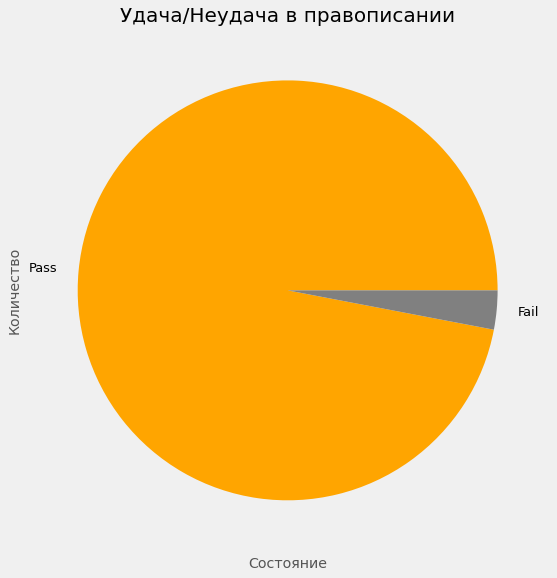

In [ ]:
# Создадим новый столбец pass_writing, этот столбец сообщит нам, прошли ли студенты или нет

df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Удача/Неудача в правописании', fontweight = 30, fontsize = 20)
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.show()

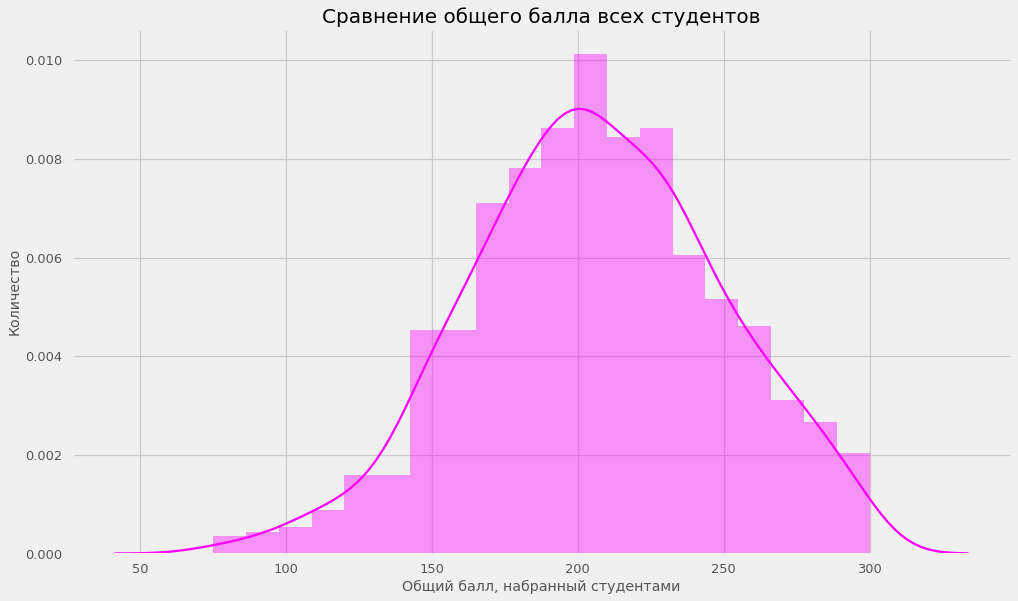

In [ ]:
# Вычисление общего балла для каждого студента

import warnings
warnings.filterwarnings('ignore')

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.distplot(df['total_score'], color = 'magenta')

plt.title('Сравнение общего балла всех студентов', fontweight = 30, fontsize = 20)
plt.xlabel('Общий балл, набранный студентами')
plt.ylabel('Количество')
plt.show()

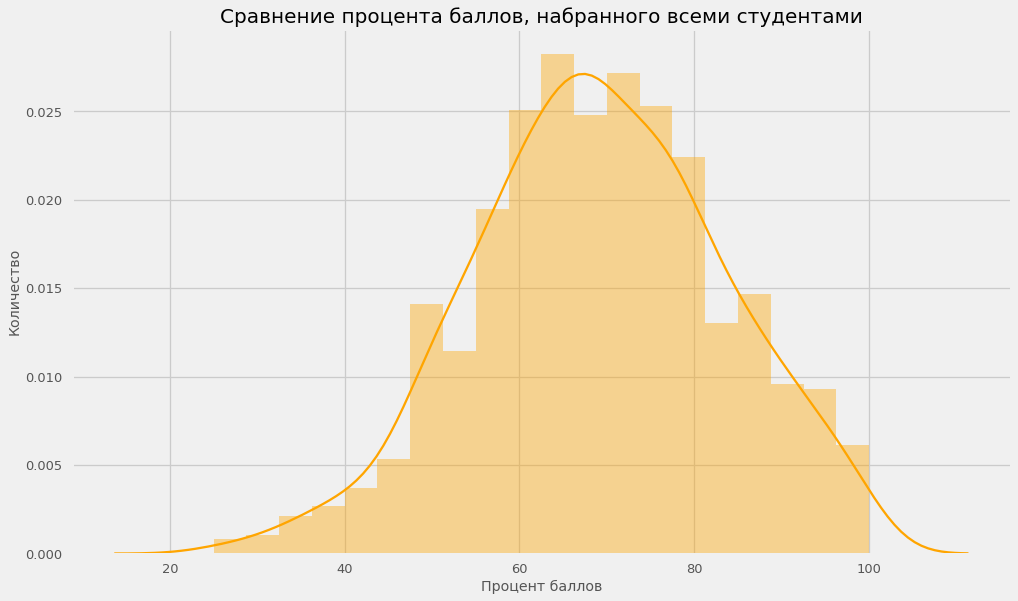

In [ ]:
# Вычисление процента баллов для каждого из студентов
from math import * 
import warnings
warnings.filterwarnings('ignore')

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
    df['percentage'][i] = ceil(df['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(df['percentage'], color = 'orange')

plt.title('Сравнение процента баллов, набранного всеми студентами', fontweight = 30, fontsize = 20)
plt.xlabel('Процент баллов')
plt.ylabel('Количество')
plt.show()

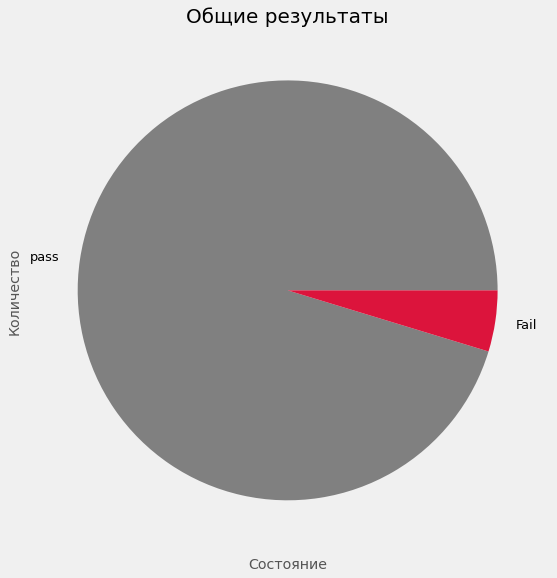

In [ ]:
# Проверка того, какое кол-во студентов потерпит неудачу в итоге

df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

df['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('Общие результаты', fontweight = 30, fontsize = 20)
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.show()

In [ ]:
# Присвоение оценок баллам по следующим критериям :
# 0  - 40 баллов : grade E
# 41 - 60 баллов : grade D
# 60 - 70 баллов : grade C
# 70 - 80 баллов : grade B
# 80 - 90 баллов : grade A
# 90 - 100 баллов : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

C    271
B    246
D    203
A    147
O     86
E     47
Name: grades, dtype: int64

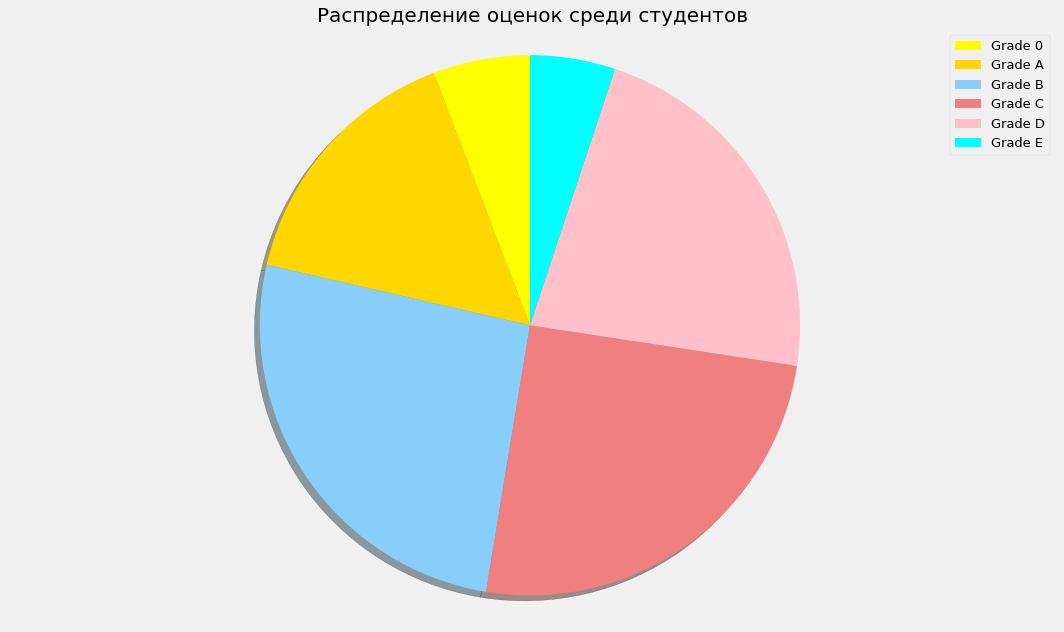

In [ ]:
# Построим круговую диаграмму для распределения различных оценок среди студентов

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [58, 156, 260, 252, 223, 51]
colors = ['yellow', 'gold', 'lightskyblue', 'lightcoral', 'pink', 'cyan']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.title('Распределение оценок среди студентов', fontweight = 30, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

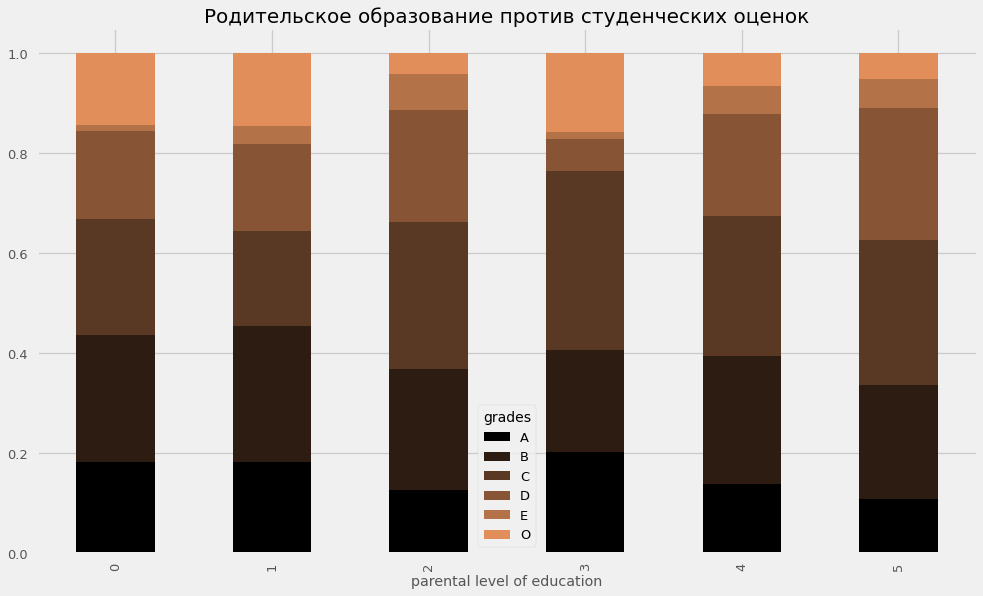

In [ ]:
# Сравнение образования родителей и оценок их детей 

plt.rcParams['figure.figsize'] = (15, 9)

x = pd.crosstab(df['parental level of education'], df['grades'])
color = plt.cm.copper(np.linspace(0, 1, 8))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = color)
plt.title("Родительское образование против студенческих оценок", fontweight = 30, fontsize = 20)
plt.show()

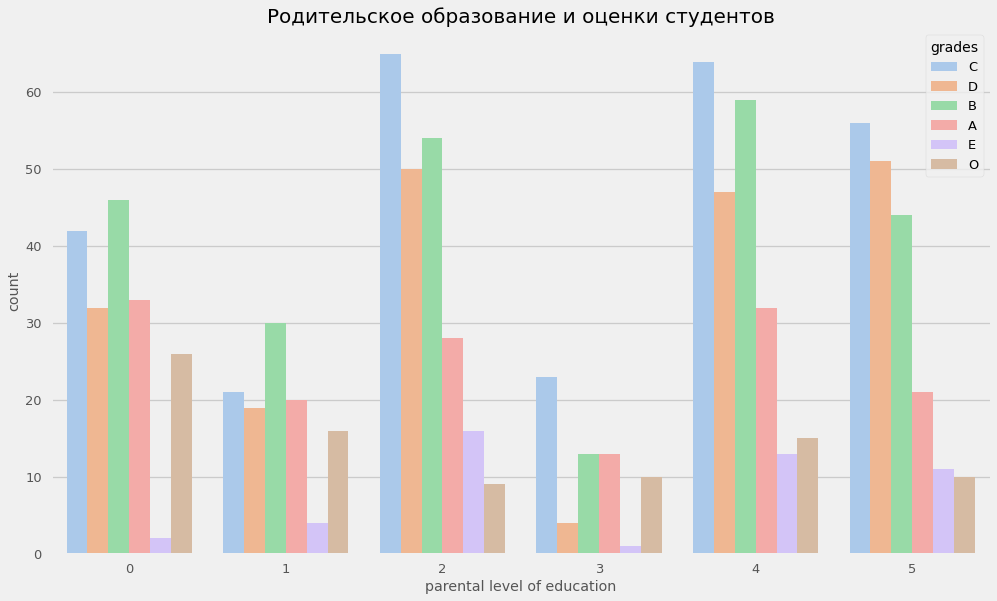

In [ ]:
# Для лучшей визуализации мы построим его заново, используя seaborn

sns.countplot(x = df['parental level of education'], data = df, hue = df['grades'], palette = 'pastel')
plt.title('Родительское образование и оценки студентов', fontsize = 20, fontweight = 30)
plt.show()

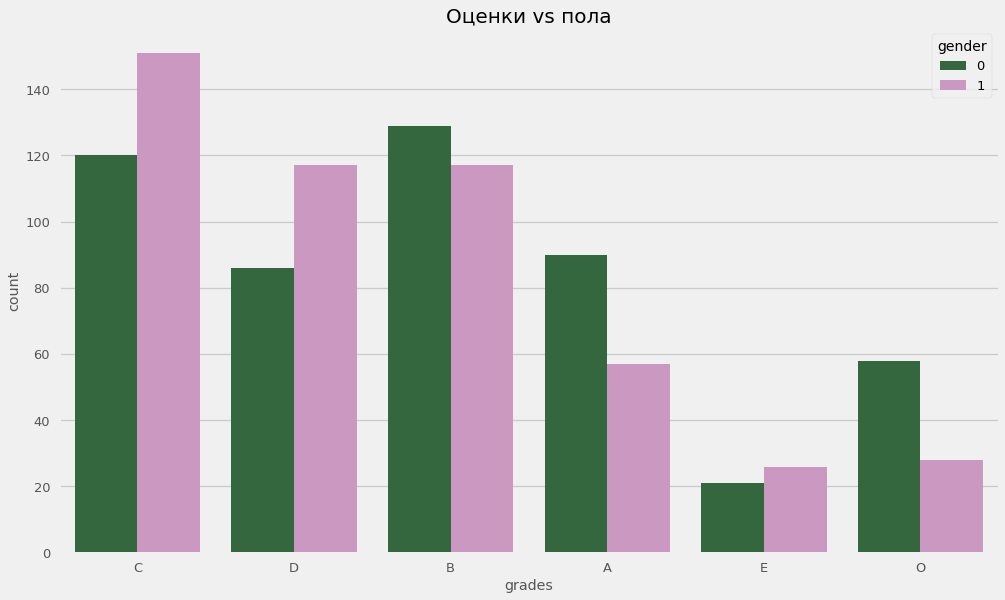

In [ ]:
# Сравним распределение оценок среди мужчин и женщин

sns.countplot(x = df['grades'], data = df, hue = df['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.title('Оценки vs пола', fontweight = 30, fontsize = 20)
plt.show()

#Кодировка данных(для сравнения)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Создадим кодировку
le = LabelEncoder()

# Кодировка данных для "курса подготовки данных"
df['test preparation course'] = le.fit_transform(df['test preparation course'])

# Кодировка данных для "наличие обеда"
df['lunch'] = le.fit_transform(df['lunch'])

# Кодировка данных для расы
## мы должны сопоставить значения для каждой из категорий
df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

# Кодировка данных для уровень обучения родителей студента
df['parental level of education'] = le.fit_transform(df['parental level of education'])

# Кодировка данных для пола
df['gender'] = le.fit_transform(df['gender'])

# Кодировка данных для pass_math
df['pass_math'] = le.fit_transform(df['pass_math'])

# Кодировка данных для pass_reading
df['pass_reading'] = le.fit_transform(df['pass_reading'])

# Кодировка данных для pass_writing
df['pass_writing'] = le.fit_transform(df['pass_writing'])

# Кодировка данных для status
df['status'] = le.fit_transform(df['status'])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,1,3,4,1,1,61,61,58,1,1,1,180,60.0,1,C
1,1,3,4,1,1,55,45,47,1,1,1,147,49.0,1,D
2,0,2,4,1,0,67,65,72,1,1,1,204,68.0,1,C
3,0,3,2,0,1,52,67,60,1,1,1,179,60.0,1,C
4,1,2,0,1,0,83,76,75,1,1,1,234,78.0,1,B


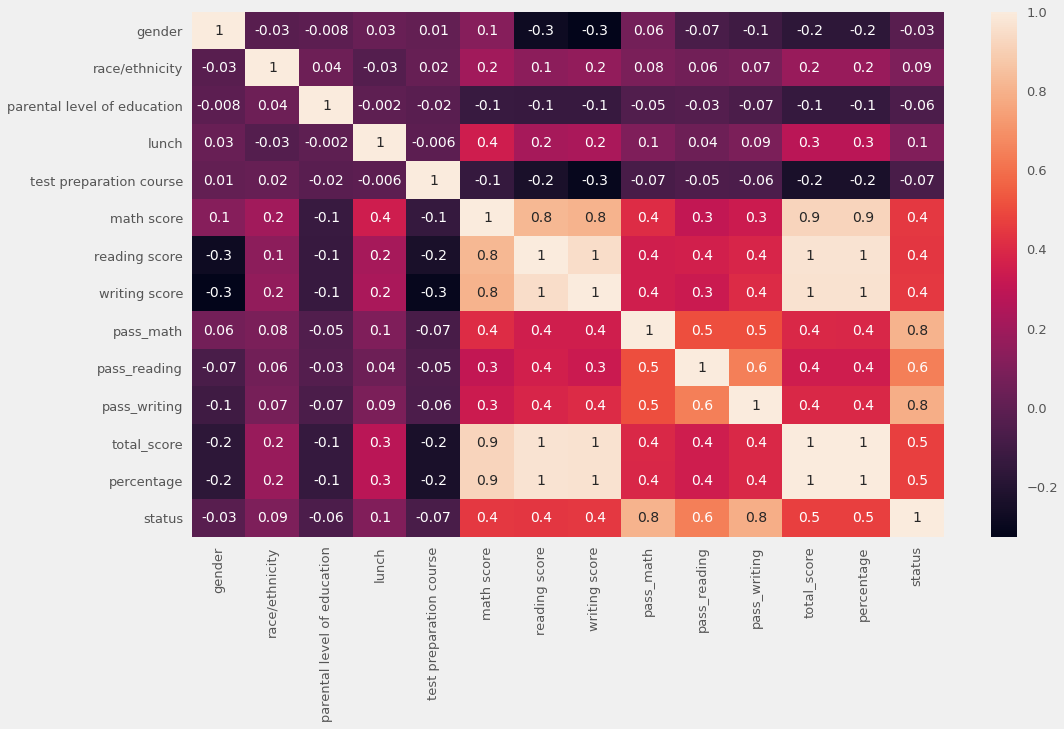

In [ ]:
sns.heatmap(df.corr(),annot = True,fmt='.1g')

# Подготовка данных

In [ ]:
# разделение зависимых и независимых переменных

x = df.iloc[:,:14]
y = df.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [ ]:
# разбиение набора данных на обучающие и тестовые наборы

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [ ]:
# импорт MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Создадим скалер
mm = MinMaxScaler()

# подача независимой переменной в скалер
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)



# Логистическая регрессия 

Моделирование

In [ ]:
from sklearn.linear_model import  LogisticRegression

# Создадим модель
model = LogisticRegression()

# Подача тренировочных данных в модель
model.fit(x_train, y_train)

# Прогнозирование результатов тестового набора
y_pred = model.predict(x_test)

# Расчет точности классификации
print("X_trsin :", x_test)
print("y_trsin :", y_pred)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.868
Testing Accuracy : 0.816


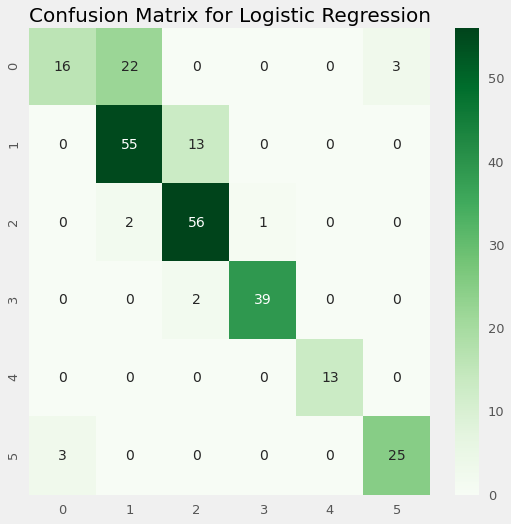

In [ ]:
from sklearn.metrics import confusion_matrix

# Создадим матрицы путаницы
cm = confusion_matrix(y_test, y_pred)

# Печать матрицы путаницы
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

Рандомный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Создание модели
model = RandomForestClassifier()

# Подача тренировочных данных в модель
model.fit(x_train, y_train)

# Прогнозирование результатов х-теста
y_pred = model.predict(x_test)

# Расчет точности
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


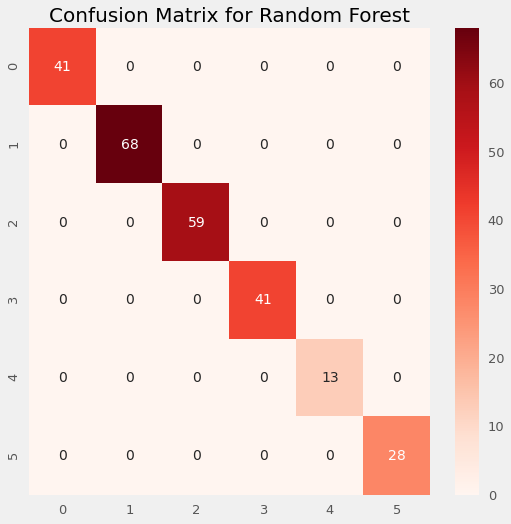

In [ ]:
from sklearn.metrics import confusion_matrix

# Создадим матрицу путаницы
cm = confusion_matrix(y_test, y_pred)

# Печать матрицы путаницы
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

In [ ]:
!pip install yellowbrick

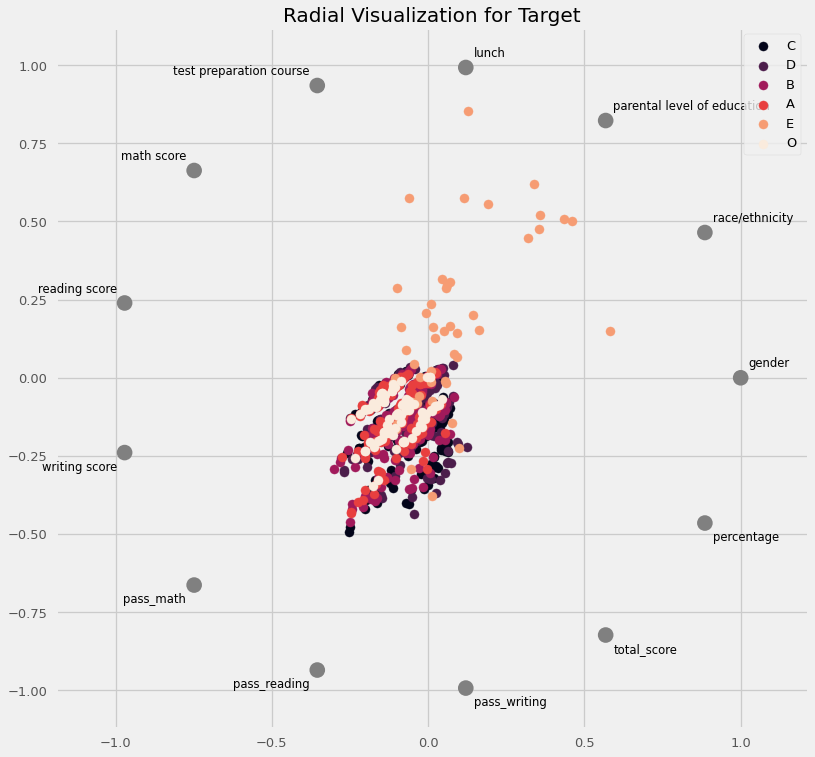

In [ ]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Модель', fontsize = 20)
plt.show()

# Матрица диогонали

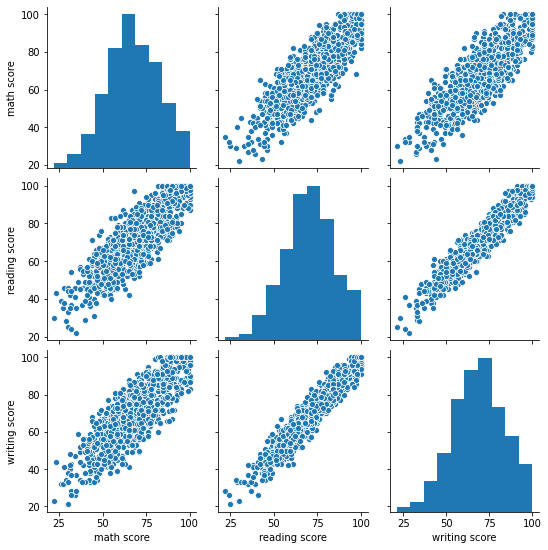

In [ ]:
#диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные scatter plots для соответствующих пар признаков.
cols = ['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')